<a href="https://colab.research.google.com/github/moon2su/ML-programming/blob/main/WISDM_1D_CNN(update).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score



# -----------------------------

# 1) 데이터 준비

# -----------------------------

cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "label"]

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iris.data", header=None, names=cols).dropna()



X = df.drop(columns=["label"])

y = df["label"]



X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.2, stratify=y, random_state=42

)



# -----------------------------

# 2) 모델 구성

# -----------------------------

dt = DecisionTreeClassifier(random_state=42)

rf = RandomForestClassifier(n_estimators=200, random_state=42)

lr = LogisticRegression(max_iter=500)



# -----------------------------

# 3) 모델 학습

# -----------------------------

dt.fit(X_train, y_train)

rf.fit(X_train, y_train)

lr.fit(X_train, y_train)



# -----------------------------

# 4) 모델 평가

# -----------------------------

#y_pred = df.predict(X_test))
#dt_acc = accuracy_score(y_test, y_pred))

dt_acc = accuracy_score(y_test, dt.predict(X_test))

rf_acc = accuracy_score(y_test, rf.predict(X_test))

lr_acc = accuracy_score(y_test, lr.predict(X_test))



print("=== Test Accuracy ===")

print(f"Decision Tree : {dt_acc:.4f}")

print(f"Random Forest : {rf_acc:.4f}")

print(f"Logistic Reg. : {lr_acc:.4f}")



=== Test Accuracy ===
Decision Tree : 0.9333
Random Forest : 0.9000
Logistic Reg. : 0.9667


In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score



# -----------------------------

# 1) 데이터 준비

# -----------------------------


df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iris.data", header=None, names=cols).dropna()
df.columns
print(df)

     sepal_length  sepal_width  petal_length  petal_width           label
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [5]:
RAW_PATH = "/content/drive/MyDrive/Colab Notebooks/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt"

In [6]:
def load_and_clean_wisdm_raw(path: str) -> pd.DataFrame:
    rows = []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            # 맨 끝 세미콜론 제거
            if line.endswith(";"):
                line = line[:-1]

            parts = [p.strip() for p in line.split(",")]
            # 기대 컬럼 수: 6 (user, activity, timestamp, x, y, z)
            if len(parts) != 6:
                continue

            user, activity, ts, x, y, z = parts
            try:
                rows.append([
                    int(user),
                    activity,
                    int(ts),
                    float(x),
                    float(y),
                    float(z),
                ])
            except ValueError:
                # 숫자 변환 실패(깨진 데이터) 라인 스킵
                continue

    df = pd.DataFrame(rows, columns=["user", "activity", "timestamp", "x", "y", "z"])
    return df

# 실행
df = load_and_clean_wisdm_raw(RAW_PATH)

# 출력
print("shape:", df.shape)
print(df.head())


shape: (1086465, 6)
   user activity       timestamp         x          y         z
0    33  Jogging  49105962326000 -0.694638  12.680544  0.503953
1    33  Jogging  49106062271000  5.012288  11.264028  0.953424
2    33  Jogging  49106112167000  4.903325  10.882658 -0.081722
3    33  Jogging  49106222305000 -0.612916  18.496431  3.023717
4    33  Jogging  49106332290000 -1.184970  12.108489  7.205164


In [7]:
#결측치 제거
df.isnull().sum()
df = df.dropna()
df

,user,activity,timestamp,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
1086460,19,Sitting,131623331483000,9.000000,-1.570000,1.690000
1086461,19,Sitting,131623371431000,9.040000,-1.460000,1.730000
1086462,19,Sitting,131623411592000,9.080000,-1.380000,1.690000
1086463,19,Sitting,131623491487000,9.000000,-1.460000,1.730000


In [8]:
df['activity'].value_counts()

,count
activity,
Walking,418393
Jogging,336445
Upstairs,122869
Downstairs,100425
Sitting,59939
Standing,48394


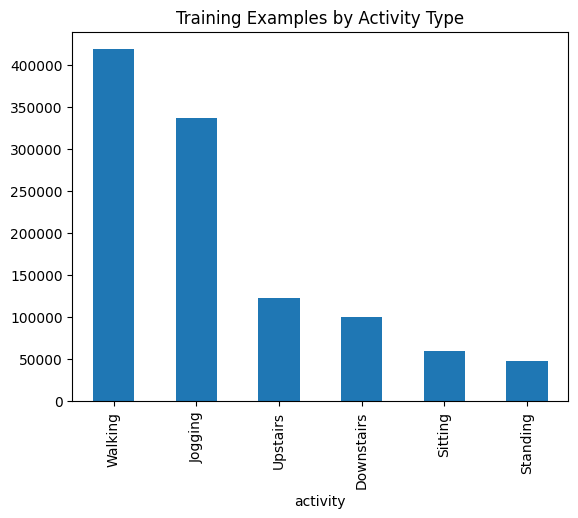

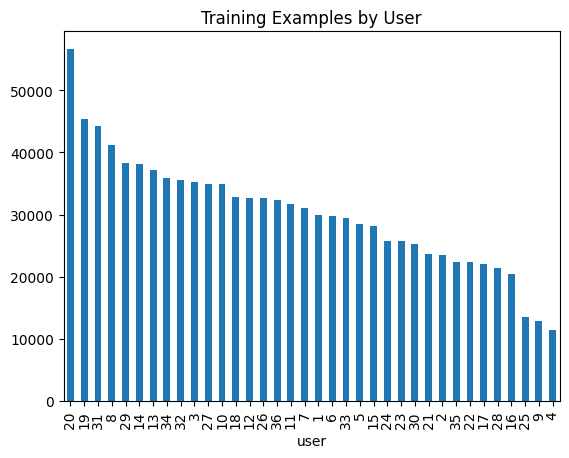

In [9]:
df["activity"].value_counts().plot(kind = "bar", title = "Training Examples by Activity Type")
plt.show()
df["user"].value_counts().plot(kind = "bar", title = "Training Examples by User")
plt.show()

In [10]:
df['x'] = df['x'].astype('float')
df['y'] = df['y'].astype('float')
df['z'] = df['z'].astype('float')

In [11]:
activities = df['activity'].value_counts().index

In [12]:
label = LabelEncoder()
df['activity'] = label.fit_transform(df['activity'])
df.head()

,user,activity,timestamp,x,y,z
0,33,1,49105962326000,-0.694638,12.680544,0.503953
1,33,1,49106062271000,5.012288,11.264028,0.953424
2,33,1,49106112167000,4.903325,10.882658,-0.081722
3,33,1,49106222305000,-0.612916,18.496431,3.023717
4,33,1,49106332290000,-1.184970,12.108489,7.205164


# WISDM dataset CNN 분류

In [13]:
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [14]:
# GPU 확인
import torch, numpy as np, pandas as pd
print("PyTorch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

PyTorch: 2.8.0+cu126
CUDA available: False


device(type='cpu')

In [15]:
RAW_PATH = "/content/drive/MyDrive/Colab Notebooks/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt"
RAW_PATH

'/content/drive/MyDrive/Colab Notebooks/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt'

In [16]:
def load_and_clean_wisdm_raw(path: str) -> pd.DataFrame:
    rows = []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            if line.endswith(";"):
                line = line[:-1]
            parts = [p.strip() for p in line.split(",")]
            if len(parts) != 6:   # 깨진 라인 스킵
                continue
            user, activity, ts, x, y, z = parts
            try:
                rows.append([
                    int(user),
                    activity,
                    int(ts),
                    float(x),
                    float(y),
                    float(z),
                ])
            except ValueError:
                continue
    df = pd.DataFrame(rows, columns=["user","activity","timestamp","x","y","z"])
    df = df.dropna().reset_index(drop=True)  # 방어적 처리(보통 결측치 없음)
    return df

df = load_and_clean_wisdm_raw(RAW_PATH)
print(df.shape)
df.head()


(1086465, 6)


,user,activity,timestamp,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [17]:
ACTIVITIES = ["Walking","Jogging","Upstairs","Downstairs","Sitting","Standing"]
label2id = {a:i for i,a in enumerate(ACTIVITIES)}
id2label = {i:a for a,i in label2id.items()}

# 사용하지 않는 레이블이 있다면 제거
df = df[df["activity"].isin(ACTIVITIES)].copy()
df["label"] = df["activity"].map(label2id)

# 사용자 단위 분할
users = sorted(df["user"].unique().tolist())
random.seed(42); random.shuffle(users)

n = len(users)
n_train = int(n * 0.7)
n_val   = int(n * 0.1)
train_users = set(users[:n_train])
val_users   = set(users[n_train:n_train+n_val])
test_users  = set(users[n_train+n_val:])

df_train = df[df.user.isin(train_users)].copy()
df_val   = df[df.user.isin(val_users)].copy()
df_test  = df[df.user.isin(test_users)].copy()

for d in (df_train, df_val, df_test):
    d.sort_values(["user","timestamp"], inplace=True, kind="mergesort")
    d.reset_index(drop=True, inplace=True)

print(f"users total={n} | train={len(train_users)} val={len(val_users)} test={len(test_users)}")
for name, d in [("train",df_train),("val",df_val),("test",df_test)]:
    print(name, d["activity"].value_counts().reindex(ACTIVITIES).fillna(0).astype(int).to_dict())


users total=36 | train=25 val=3 test=8
train {'Walking': 295361, 'Jogging': 250885, 'Upstairs': 91136, 'Downstairs': 73000, 'Sitting': 46044, 'Standing': 34686}
val {'Walking': 32985, 'Jogging': 19093, 'Upstairs': 13577, 'Downstairs': 10355, 'Sitting': 3134, 'Standing': 4447}
test {'Walking': 90047, 'Jogging': 66467, 'Upstairs': 18156, 'Downstairs': 17070, 'Sitting': 10761, 'Standing': 9261}


In [32]:
SEQ_LEN = 200   # 윈도우 길이(샘플 수)
STRIDE  = 20    # 보폭
# 50 -> overlap = 75%, TEST acc = 0.8754 --> 최적.
# 80 -> overlap = 60%, TEST acc = 0.8498
# 20 -> overlap = 90%, TEST acc = 0.8714
FEATS   = ["x","y","z"]

def make_windows(df_part, seq_len=SEQ_LEN, stride=STRIDE, feats=FEATS):
    """
    같은 activity가 연속인 구간에서만 윈도우를 추출해 레이블 일관성 보장.
    반환: [(window(np.float32[seq_len, 3]), label(int)), ...]
    """
    segments = []
    for user, df_u in df_part.groupby("user", sort=False):
        # activity가 바뀌는 경계로 그룹핑
        boundaries = (df_u["activity"].shift() != df_u["activity"]).cumsum()
        for _, df_seg in df_u.groupby(boundaries, sort=False):
            label = int(df_seg.iloc[0]["label"])
            vals = df_seg[feats].to_numpy(dtype=np.float32)  # (L,3)
            L = len(vals)
            if L < seq_len:
                continue
            for start in range(0, L-seq_len+1, stride):
                window = vals[start:start+seq_len]
                segments.append((window, label))
    return segments

train_segments = make_windows(df_train)
val_segments   = make_windows(df_val)
test_segments  = make_windows(df_test)

len(train_segments), len(val_segments), len(test_segments)


(36775, 3883, 9753)

In [33]:
scaler = StandardScaler()
# 훈련 윈도우 모두 쌓아서 (N*SEQ_LEN, 3) 형태로 fit
train_stack = np.concatenate([w for (w,_) in train_segments], axis=0)
scaler.fit(train_stack)

def apply_scaler(segments, scaler):
    out = []
    for w, y in segments:
        out.append((scaler.transform(w), y))  # (seq_len, 3)
    return out

train_segments = apply_scaler(train_segments, scaler)
val_segments   = apply_scaler(val_segments, scaler)
test_segments  = apply_scaler(test_segments, scaler)

In [34]:
class SeqDataset(Dataset):
    def __init__(self, segments):
        # CNN1D 입력: (B, C, T) → 여기서 C=3, T=SEQ_LEN
        self.X = [torch.tensor(w.T, dtype=torch.float32) for (w,_) in segments]  # (3, T)
        self.y = [y for (_,y) in segments]
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], torch.tensor(self.y[idx], dtype=torch.long)

BATCH = 128
ds_train = SeqDataset(train_segments)
ds_val   = SeqDataset(val_segments)
ds_test  = SeqDataset(test_segments)

dl_train = DataLoader(ds_train, batch_size=BATCH, shuffle=True,  num_workers=2, pin_memory=True)
dl_val   = DataLoader(ds_val,   batch_size=BATCH, shuffle=False, num_workers=2, pin_memory=True)
dl_test  = DataLoader(ds_test,  batch_size=BATCH, shuffle=False, num_workers=2, pin_memory=True)

len(ds_train), len(ds_val), len(ds_test)


(36775, 3883, 9753)

In [35]:
class CNN1DHAR(nn.Module):
    def __init__(self, n_classes=6, in_ch=3):
        super().__init__()
        self.feat = nn.Sequential(
            nn.Conv1d(in_ch, 64, kernel_size=7, padding=3),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2),      # /2

            nn.Conv1d(64, 128, kernel_size=5, padding=2),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(2),      # /4

            nn.Conv1d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)  # (B,256,1)
        )
        self.head = nn.Sequential(
            nn.Flatten(),           # (B,256)
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, n_classes)
        )
    def forward(self, x):            # x: (B,3,T)
        h = self.feat(x)
        return self.head(h)

model = CNN1DHAR(n_classes=len(ACTIVITIES), in_ch=3).to(device)
model


CNN1DHAR(
  (feat): Sequential(
    (0): Conv1d(3, 64, kernel_size=(7,), stride=(1,), padding=(3,))
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv1d(64, 128, kernel_size=(5,), stride=(1,), padding=(2,))
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (9): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): AdaptiveAvgPool1d(output_size=1)
  )
  (head): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.3, inplace=False)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.3, inplace=False)
    (5

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=2)

def run_epoch(loader, train=False):
    model.train(train)
    total_loss, total_correct, total_count = 0.0, 0, 0
    for X, y in loader:
        X, y = X.to(device, non_blocking=True), y.to(device, non_blocking=True)
        if train:
            optimizer.zero_grad()
        logits = model(X)
        loss = criterion(logits, y)
        if train:
            loss.backward()
            optimizer.step()
        total_loss += loss.item() * X.size(0)
        total_correct += (logits.argmax(1) == y).sum().item()
        total_count  += X.size(0)
    return total_loss/total_count, total_correct/total_count

EPOCHS = 12  # Colab에서 빠르게 실험하려면 8~12 정도로 시작
best_val_acc, best_state = 0.0, None

for ep in range(1, EPOCHS+1):
    tr_loss, tr_acc = run_epoch(dl_train, train=True)
    va_loss, va_acc = run_epoch(dl_val,   train=False)
    scheduler.step(va_loss)
    if va_acc > best_val_acc:
        best_val_acc = va_acc
        best_state = {k:v.cpu() for k,v in model.state_dict().items()}
    print(f"[{ep:02d}] train {tr_loss:.4f}/{tr_acc:.4f} | val {va_loss:.4f}/{va_acc:.4f}")

# 최적 가중치 로드
if best_state is not None:
    model.load_state_dict({k:v.to(device) for k,v in best_state.items()})


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[01] train 0.2358/0.9205 | val 1.3621/0.6227
[02] train 0.0374/0.9887 | val 2.0142/0.6946
[03] train 0.0296/0.9906 | val 1.9549/0.7049
[04] train 0.0164/0.9953 | val 1.0522/0.8349
[05] train 0.0159/0.9954 | val 1.6349/0.7574
[06] train 0.0279/0.9915 | val 1.7422/0.7129
[07] train 0.0148/0.9958 | val 1.9976/0.7221
[08] train 0.0077/0.9981 | val 4.4090/0.6652
[09] train 0.0055/0.9985 | val 3.2503/0.6660
[10] train 0.0049/0.9987 | val 2.2785/0.6977
[11] train 0.0042/0.9989 | val 3.1294/0.6675
[12] train 0.0035/0.9992 | val 2.3424/0.6861


In [37]:
te_loss, te_acc = run_epoch(dl_test, train=False)
print(f"TEST acc = {te_acc:.4f}")

y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for X, y in dl_test:
        X = X.to(device)
        pred = model(X).argmax(1).cpu().numpy().tolist()
        y_pred.extend(pred); y_true.extend(y.numpy().tolist())

print(classification_report(y_true, y_pred, target_names=ACTIVITIES))
print(confusion_matrix(y_true, y_pred))


TEST acc = 0.8714
              precision    recall  f1-score   support

     Walking       0.97      0.85      0.91      4384
     Jogging       0.98      0.89      0.94      3191
    Upstairs       0.64      0.90      0.75       658
  Downstairs       0.40      0.81      0.53       624
     Sitting       1.00      0.89      0.94       481
    Standing       1.00      1.00      1.00       415

    accuracy                           0.87      9753
   macro avg       0.83      0.89      0.84      9753
weighted avg       0.92      0.87      0.89      9753

[[3707    0  139  538    0    0]
 [   0 2851  111  229    0    0]
 [  16   43  590    9    0    0]
 [  34    2   80  508    0    0]
 [  49    4    0    0  428    0]
 [   0    0    0    0    0  415]]


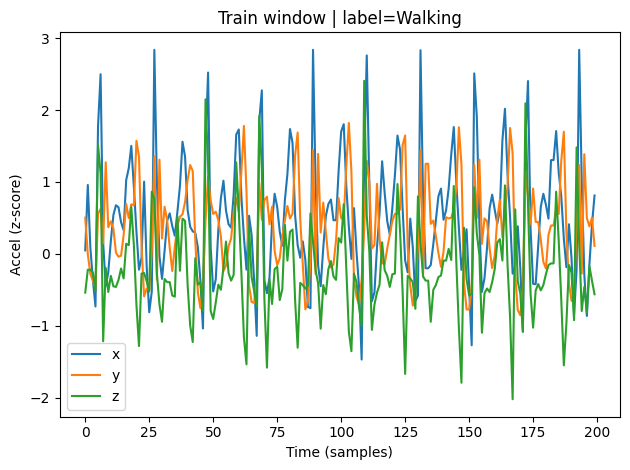

In [38]:
def plot_sample_window(segments, idx=0, title_prefix="Sample window"):
    win, y = segments[idx]                     # (T,3), int
    t = np.arange(win.shape[0])
    plt.figure()
    plt.plot(t, win[:,0], label="x")
    plt.plot(t, win[:,1], label="y")
    plt.plot(t, win[:,2], label="z")
    plt.title(f"{title_prefix} | label={id2label[y]}")
    plt.xlabel("Time (samples)")
    plt.ylabel("Accel (z-score)")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_sample_window(train_segments, idx=0, title_prefix="Train window")